# Github Link
### https://github.com/chandrakantpandit/Car-Mileage-Prediction-Model.git

In [1]:
#import the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
#import the data
cars_data = pd.read_csv('mpg.csv')

# Exploratory Analysis of Data
## About the Data

In [3]:
# Number of Instances: 398
# Number of Attributes: 9 including the class attribute
# Attribute Information:
#   1. mpg:           continuous
#   2. cylinders:     multi-valued discrete
#   3. displacement:  continuous
#   4. horsepower:    continuous
#   5. weight:        continuous
#   6. acceleration:  continuous
#   7. model year:    multi-valued discrete
#   8. origin:        multi-valued discrete
#   9. car name:      string (unique for each instance)

# Missing Attribute Values:  horsepower has 6 missing values

In [4]:
cars_data.head()
cars_data.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# Drop extraneous variable
cars_data = cars_data.drop('name', axis=1)
cars_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
# Handle Missing Values(as we have enough data so we can drop the rows having missing values, another options could be 
# to use mean/median values)
cars_data.isnull().any()
cars_data.horsepower.unique()
cars_data = cars_data[cars_data.horsepower != '?']
#change type from object to float
cars_data.horsepower = cars_data.horsepower.astype('float')

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
dtype: bool

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148', '129',
       '96', '71', '98', '115', '53', '81', '79', '120', '152', '102',
       '108', '68', '58', '149', '89', '63', '48', '66', '139', '103',
       '125', '133', '138', '135', '142', '77', '62', '132', '84', '64',
       '74', '116', '82'], dtype=object)

In [7]:
cars_data.describe()
cars_data.shape

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


(392, 8)

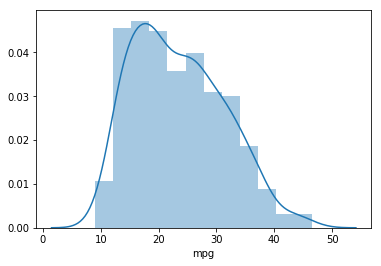

In [8]:
# Data Visualization
sns.distplot(cars_data.mpg)

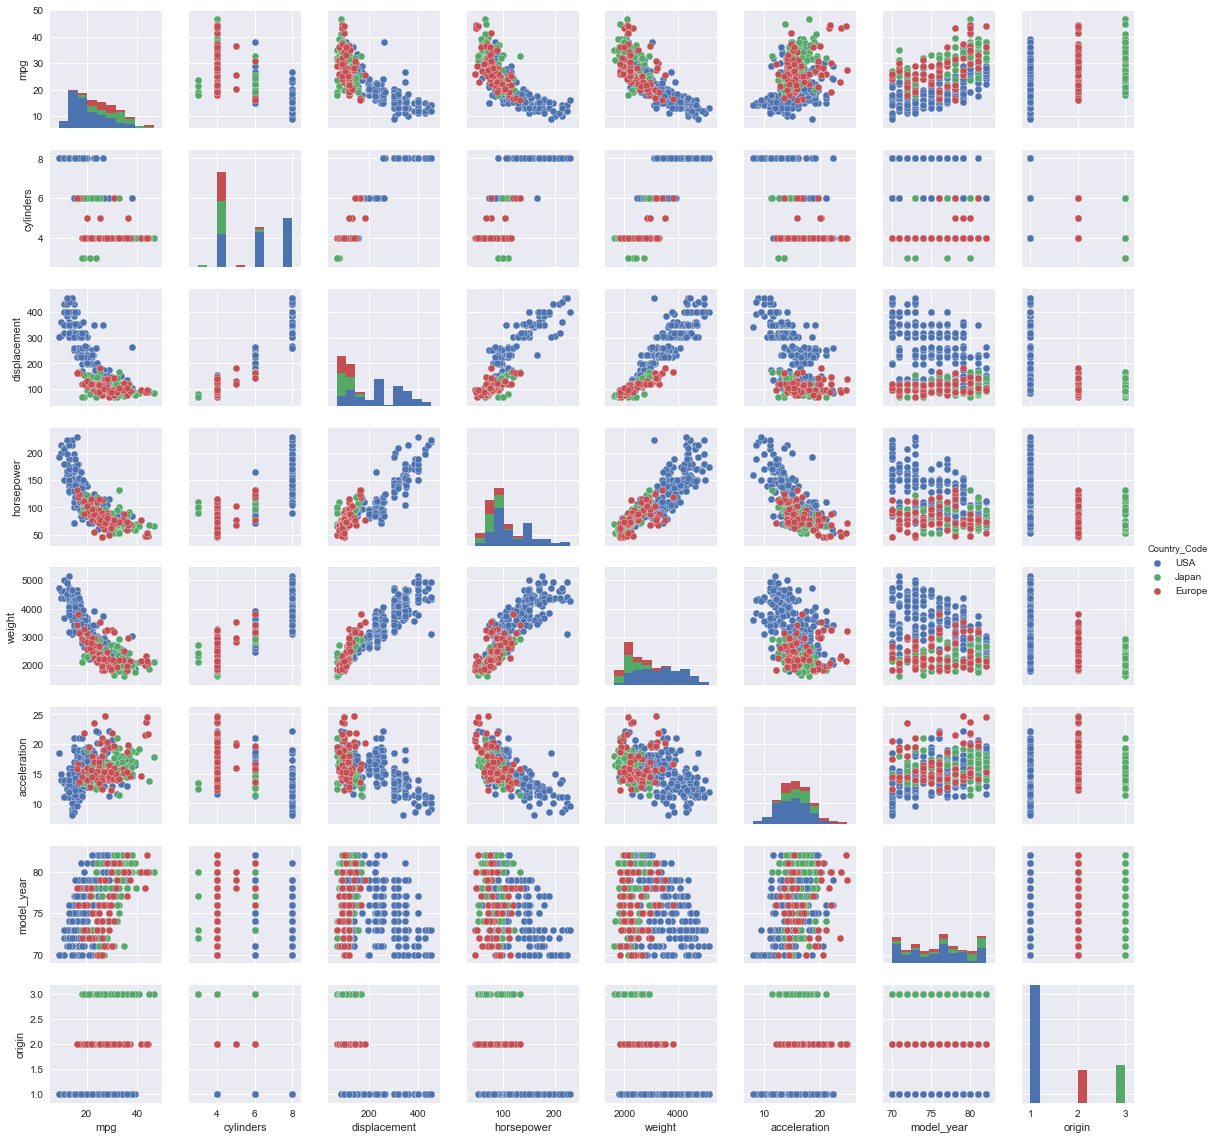

In [9]:
cars_data['Country_Code'] = cars_data.origin.replace([1,2,3],['USA','Europe','Japan'])
sns.set()
sns.pairplot(cars_data, size = 2.0,hue ='Country_Code')
plt.show()

In [10]:
cars_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,Country_Code
0,18.0,8,307.0,130.0,3504,12.0,70,1,USA
1,15.0,8,350.0,165.0,3693,11.5,70,1,USA
2,18.0,8,318.0,150.0,3436,11.0,70,1,USA
3,16.0,8,304.0,150.0,3433,12.0,70,1,USA
4,17.0,8,302.0,140.0,3449,10.5,70,1,USA


Text(0.5,0,'MPG')

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

Text(0,0.5,'count')

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text yticklabel objects>)

(array([  3.,  10.,  40.,  38.,  36.,  37.,  29.,  29.,  20.,  33.,  24.,
         24.,  20.,  17.,  13.,   9.,   3.,   1.,   5.,   1.]),
 array([  9.  ,  10.88,  12.76,  14.64,  16.52,  18.4 ,  20.28,  22.16,
         24.04,  25.92,  27.8 ,  29.68,  31.56,  33.44,  35.32,  37.2 ,
         39.08,  40.96,  42.84,  44.72,  46.6 ]),
 <a list of 20 Patch objects>)

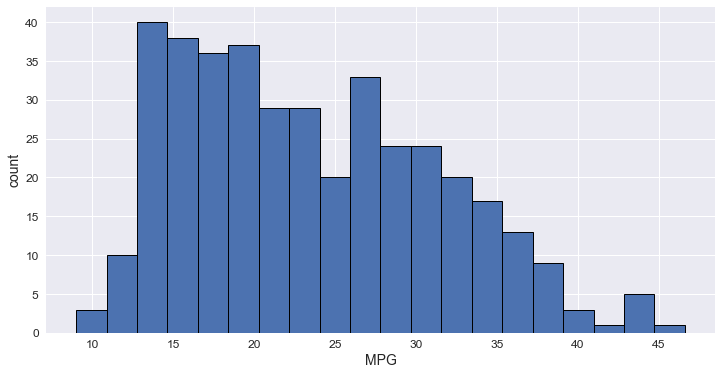

In [11]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
plt.xlabel('MPG',fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('count',fontsize=14)
plt.yticks(fontsize=12)
plt.hist(cars_data['mpg'],bins=20,edgecolor='black',linewidth=1.0)

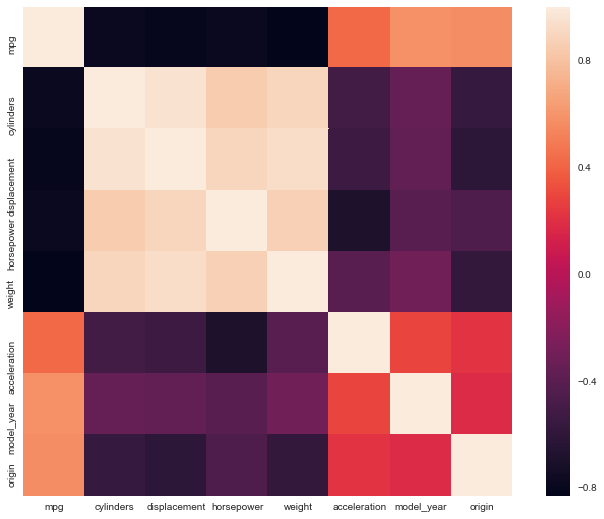

In [12]:
# Check for correlation and collinearity
corr_data = cars_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_data, square=True);

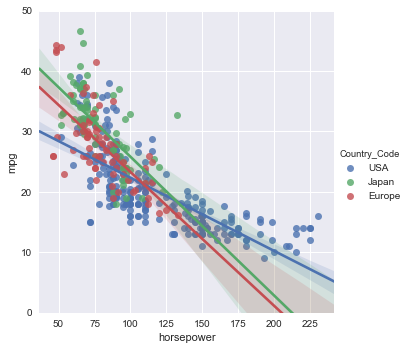

In [13]:
# horsepower vs mpg
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=cars_data,hue='Country_Code')
plot.set(ylim = (0,50))

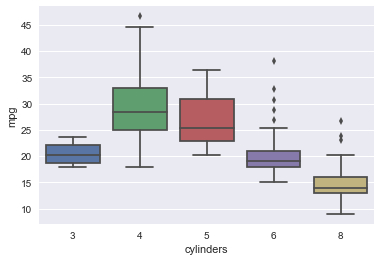

In [14]:
#Cylinders vs mpg: as no of cylinder goes up mpg goes down.
sns.boxplot(cars_data['cylinders'],cars_data['mpg'])

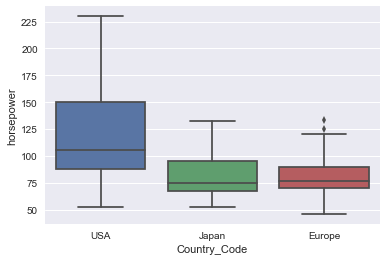

In [15]:
# Countries vs horsepower: we see American cars have higher horsepower as compare to Japan and Europe.
sns.boxplot(cars_data['Country_Code'],cars_data['horsepower'])

In [16]:
#For model purpose lets drop the country_code and transform the origin into dummy variables.
dummies = pd.get_dummies(cars_data['Country_Code'])
cars_data1 = pd.concat([cars_data, dummies], axis=1)
cars_data1 = cars_data1.drop(['Country_Code','origin'], axis=1)

In [17]:
cars_data1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [18]:
#Split the data into training and test data
X = cars_data1.drop('mpg', axis=1)
y = cars_data1[['mpg']]

from sklearn.model_selection import train_test_split

# Split X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [19]:
# The values for different features have different scale, let's scale all independent features. To avoid biasing.
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Create the models
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
y_predicted = regression_model.predict(X_test_scaled)

In [22]:
#Evaluate the models
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cylinders is -0.42607526062332224
The coefficient for displacement is 7.7223247811956535
The coefficient for horsepower is -0.4616495092441132
The coefficient for weight is -25.955932496467007
The coefficient for acceleration is 3.9067608960391307
The coefficient for model_year is 8.960017923245442
The coefficient for Europe is 0.758254207536651
The coefficient for Japan is 0.974036275439059
The coefficient for USA is -1.732290482975707


In [23]:
from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 2.64322724238
MSE: 11.9359772116
RMSE: 3.45484836304


In [24]:
#Calculate the R2 and adjusted R2
print (r2_score(y_test, y_predicted))
print(1 - (1-r2_score(y_test, y_predicted))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

0.824490991131
0.818222812243


# Principal component Analysis

In [25]:
from sklearn.decomposition import PCA
factors = ['cylinders','displacement','horsepower','acceleration','weight','Europe','Japan','USA','model_year']
# create the PCA instance
pca = PCA(n_components=2)
#fit the data
pca.fit(cars_data1[factors])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
# access values and vectors
pca.explained_variance_ratio_
print(pca.components_)
pca1 = pca.components_[0]
pca2 = pca.components_[1]

array([ 0.99756153,  0.00206281])

[[  1.79262243e-03   1.14341281e-01   3.89670387e-02  -1.35283473e-03
    9.92673477e-01  -1.30825033e-04  -2.10356434e-04   3.41181467e-04
   -1.33684141e-03]
 [  1.33244756e-02   9.45775981e-01   2.98249740e-01  -3.48259523e-02
   -1.20752107e-01  -2.48910959e-03  -3.76721334e-04   2.86583093e-03
   -2.38511055e-02]]


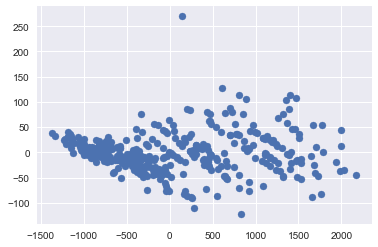

In [27]:
transformed_data = pca.transform(cars_data1[factors])
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]
plt.scatter(pc1,pc2)

# Conclusion:

In [28]:
    # Adjusted R2 is around 82%, therefore we can say that the model is reasonably good.
    # Cylinder, horsepower and weight have negative coefficient.
    # Displacement, Acceleration, Model year have positive coefficient.
    # Japanes cars are having highest mileage and US cars are having the least milage.
    